As you will see, we are introducing `pandas` in this assignment.  Pay close attention to the hints.  You can also use `numpy`, `scipy`, and `matplotlib`, but do not use any fitting packages such as `scipy.optimize.curve_fit` to solve for the parameters and uncertainties.  As the fitting functions are linear, the solutions can be obtained entirely with `numpy`'s linear algebra operations.

---

**Question 1**

**CODING:** (3 pts) The file `SunspotNumber.dat` contains data on the number of sunspots observed each day since January 1, 1818 through September 30, 2020.  Columns are 1) year, 2) month, 3) day, and 4) number of sunspots observed (`-1` indicates that no data were taken on that day -- i.e., the data is missing).

```
...
1819 03 21    0
1819 03 22   30
1819 03 23   20
1819 03 24   -1
1819 03 25   -1
1819 03 26   17
...
```

(a) Calculate the monthly mean of the sunspot number. Ignore uncertainties. The output should be a pandas Series indexed by (year, month) with the mean number of sunspots in each month.

(b) Repeat part (a) for the yearly mean.  This will be used in the next problem.

In [1]:
import pandas as pd

sun_df = pd.read_csv('SunspotNumber.dat', 
                     names=['year', 'month', 'day', 'sunspots'],  # Give the names of the columns
                     delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                     na_values=-1,  # Tell pandas that -1 means No Data.
                    )
sun_df.describe()

,year,month,day,sunspots
count,74053.000000,74053.000000,74053.000000,70806.000000
mean,1918.875468,6.517413,15.729370,82.569133
std,58.529381,3.447120,8.800026,77.264053
min,1818.000000,1.000000,1.000000,0.000000
25%,1868.000000,4.000000,8.000000,21.000000
50%,1919.000000,7.000000,16.000000,62.000000
75%,1970.000000,10.000000,23.000000,127.000000
max,2020.000000,12.000000,31.000000,528.000000


In [2]:
# Question 1a
def mean_sunspots_by_month(df):
    """
    Calculate the mean number of sunspots observed in each month.

    The input pandas data frame include columns named 'year', 'month', 'day', and 'sunspots'.
    
    Rows where the number of sunspots is NaN should be ignored when taking the average.
    
    Returns a pandas Series indexed by (year, month) with the mean number of sunspots in each month.
    """
    # Hints: 
    # 1. Use the groupby method to group the rows by year and month values.
    # 2. Select the 'sunspots' column from this structure.
    # 3. Then the mean method will compute the mean in each group.
    
    ### BEGIN SOLUTION
    return df.groupby(['year', 'month'])['sunspots'].mean()
    ### END SOLUTION

# Question 1b
def mean_sunspots_by_year(df):
    """
    Calculate the mean number of sunspots observed in each year.

    The input pandas data frame include columns named 'year', 'month', 'day', and 'sunspots'.
    
    Rows where the number of sunspots is NaN should be ignored when taking the average.
    
    Returns a pandas Series indexed by (year) with the mean number of sunspots in each year.
    """
    # Hint: Same as above, but grouped by year only.
    
    ### BEGIN SOLUTION
    return df.groupby(['year'])['sunspots'].mean()
    ### END SOLUTION
    

In [3]:
import numpy as np

sunspots_by_month = mean_sunspots_by_month(sun_df)
print('Sunspots by month:\n')
print(sunspots_by_month,'\n')
print(sunspots_by_month.describe())

sunspots_by_year = mean_sunspots_by_year(sun_df)
print('\n\nSunspots by year:\n')
print(sunspots_by_year,'\n')
print(sunspots_by_year.describe())

# Some sanity checks
assert len(sunspots_by_year) == len(np.unique(sun_df['year']))
assert np.all(sunspots_by_year.index == np.unique(sun_df['year']))
assert sunspots_by_year.index[0] == np.min(sun_df['year'])
assert sunspots_by_year.index[-1] == np.max(sun_df['year'])

assert np.ceil(len(sunspots_by_month) / 12) == len(sunspots_by_year)
assert sunspots_by_month.index[-1] == (2020, 9)

### BEGIN HIDDEN TESTS

# This code snippet lets us just log the test failures so we can see all the things that fail, rather than
# bomb out on the first failure.  Then at the end, we just assert that there were 0 failures to get the
# automatic grading to give points.
nfail=0
from contextlib import contextmanager
import traceback
@contextmanager
def log_assert():
    global nfail
    try:
        yield
    except AssertionError as e:
        print('Failed assert:')
        print(traceback.format_stack()[-3].split('\n')[1])
        print('    msg =',str(e))
        nfail += 1
        
# Tests for 1a:
with log_assert():
    assert len(sunspots_by_month) == 2433, len(sunspots_by_month)
with log_assert():
    # One of the months had no data, so shows up in len, but not count.
    assert sunspots_by_month.count() == 2432, sunspots_by_month.count
with log_assert():
    assert np.isclose(np.min(sunspots_by_month), 0), np.min(sunspots_by_month)
with log_assert():
    assert np.isclose(np.max(sunspots_by_month), 359.387097), np.max(sunspots_by_month)

# Tests for 1b:
with log_assert():
    assert len(sunspots_by_year) == 203, len(sunspots_by_year)
with log_assert():
    assert np.isclose(np.min(sunspots_by_year), 2.178808), np.min(sunspots_by_year)
with log_assert():
    assert np.isclose(np.max(sunspots_by_year), 269.293151), np.max(sunspots_by_year)

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

Sunspots by month:

year  month
1818  1        58.125000
      2        37.428571
      3        42.357143
      4        57.523810
      5        88.480000
                 ...    
2020  5         0.193548
      6         5.833333
      7         6.258065
      8         7.645161
      9         0.700000
Name: sunspots, Length: 2433, dtype: float64 

count    2432.000000
mean       83.358980
std        68.631714
min         0.000000
25%        24.314516
50%        70.259217
75%       126.529570
max       359.387097
Name: sunspots, dtype: float64


Sunspots by year:

year
1818    52.938967
1819    38.534137
1820    24.232143
1821     9.180921
1822     6.254958
          ...    
2016    39.822404
2017    21.739726
2018     6.972603
2019     3.605479
2020     3.770073
Name: sunspots, Length: 203, dtype: float64 

count    203.000000
mean      83.090638
std       64.107269
min        2.178808
25%       24.963158
50%       73.216438
75%      122.483565
max      269.293151
Name: sunspots, d

---

**Question 2**

The file `SatelliteReentry.dat` contains the number of satellites in low-Earth orbits that reentered and burned in the Earth's atmosphere from 1969 to 2004.

```
1969   26
1970   25
1971   19
1972   12
1973   14
1974   21
...
```

The goal of this problem is to see if there is a relation between solar activity (using sunspot number as a proxy) and the number of satellites that reenter the atmosphere.  We will model the relation with a straight line given by:

\begin{equation}
  N_{\text{reentry}} = a + b N_{\text{sunspot}}
\end{equation}

where $a$ and $b$ are the fitting parameters.


a) (3 pts) Taking the gaussian standard deviation of $N_i$ to be $\sqrt{N_i}$, determine the maximum likelihood estimate of $a$ and $b$.
    
b) (3 pts) Determine their standard deviations $\sigma_a$ and $\sigma_b$, and their covariance $\sigma_{ab}$.
    
c) (1 pt) Plot the data with uncertainties and the best-fit model superimposed.  Make the plot look nice - i.e., label axes, use legible markers, colors, etc.
    
d) (2 pts) Calculate the $\chi^2$ values on a grid of $a$ and $b$ and use the matplotlib `contour` function to plot the contours of constant $\chi^2$ values for $\chi^2 = \chi^2_{\mathrm{min}} + 2.30, 6.17,$ and $11.8$.  Make sure your grid and contour plot is large enough to show all three contour levels.

In [4]:
sat_df = pd.read_csv('SatelliteReentry.dat',
                     names=['year', 'reentries'],  # Give the names of the columns
                     delim_whitespace=True,  # The default is to use ',' as the delimiter. 
                    )
sat_df.describe()

,year,reentries
count,36.000000,36.000000
mean,1986.500000,26.083333
std,10.535654,9.860093
min,1969.000000,12.000000
25%,1977.750000,17.750000
50%,1986.500000,25.000000
75%,1995.250000,33.000000
max,2004.000000,45.000000


In [5]:
# Question 2a
def fit_reentries_vs_sunspots(n_sunspots, n_reentries):
    """
    Fit a linear regression to the relation
    
        n_reentries = a + b n_sunspots
        
    The inputs are pandas Series instances, indexed by year.  However, they don't (necessarily) have the
    same years, so this function will only consider the subset of years common to both series.
    
    The uncertainty in the number of reentries is taken to be sigma_N = sqrt(N).
    
    Returns a, b
    """
    # Hints: 
    # 1. You can do math with pandas series just like numpy arrays.  
    #    They can also be used as arguments to (most) numpy functions where an array could be used.  
    #    So you can write x**2, x*y, np.sum(x), etc.
    # 2. Make sure to use just the subset of years where you have both kinds of data.
    #    e.g. with the pandas Index.intersection method.
    # 3. For the MLE solution, you need to code this up yourself.  Don't use a canned fitting function from
    #    scipy, scikit-learn, or other similar package.

    ### BEGIN SOLUTION

    # First find the overlap in year.
    common_indx = n_sunspots.index.intersection(n_reentries.index)    
    
    # Define a convenient shorthand notation
    x = n_sunspots[common_indx]
    y = n_reentries[common_indx]
    w = 1./y  # 1/sigma_N^2

    # This follows the notation from Numerical Recipes.
    S = np.sum(w)
    Sx = np.sum(w * x)
    Sy = np.sum(w * y)
    Sxx = np.sum(w * x * x)
    Sxy = np.sum(w * x * y)
    Delta = Sxx * S - Sx**2
    a = (Sxx * Sy - Sx * Sxy) / Delta
    b = (Sxy * S - Sx * Sy) / Delta
    return a, b
    ### END SOLUTION

In [6]:
n_sunspots = mean_sunspots_by_year(sun_df)
n_reentries = sat_df.set_index('year')['reentries']

a, b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)

print("Best fit solution is Nr = a + b Ns = {:.3f} + {:.3f} Ns".format(a,b))

### BEGIN HIDDEN TESTS
nfail=0

# Test against known correct answers:
true_a = 13.113226284812153
true_b = 0.10990493373943168
with log_assert():
    assert np.isclose(a, true_a, rtol=1.e-4), (a, true_a)
with log_assert():
    assert np.isclose(b, true_b, rtol=1.e-4), (b, true_b)
    
print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

Best fit solution is Nr = a + b Ns = 13.113 + 0.110 Ns

Total of 0 test failures


In [7]:
# Question 2b
def calculate_cov(n_sunspots, n_reentries):
    """Calculate the covariance matrix of (a,b), the linear fit to
    
        n_reentries = a + b n_sunspots
    
    Returns 2D numpy array [[ sigma_a^2  sigma_ab  ]
                            [ sigma_ab   sigma_b^2 ]]
    """
    # Note: Again, code this up yourself.  Don't use a canned fitting function from
    #       scipy, scikit-learn, or other similar package.
    
    ### BEGIN SOLUTION
    x = n_sunspots
    y = n_reentries
    w = 1./y
    
    S = np.sum(w)
    Sx = np.sum(w * x)
    Sy = np.sum(w * y)
    Sxx = np.sum(w * x * x)
    Sxy = np.sum(w * x * y)
    Delta = Sxx * S - Sx**2
    vara = Sxx / Delta
    varb = S / Delta
    covab = -Sx / Delta
    return np.array([[vara, covab], [covab, varb]])
    ### END SOLUTION

In [8]:
cov = calculate_cov(n_sunspots, n_reentries)
print("a = {:.3f} +- {:.3f}".format(a, np.sqrt(cov[0,0])))
print("b = {:.3f} +- {:.3f}".format(b, np.sqrt(cov[1,1])))
print("Covariance of (a,b) = {:.3f}".format(cov[0,1]))

### BEGIN HIDDEN TESTS
nfail=0

print(cov)
# Test against known correct answers:
true_cov = [[ 1.83935879e+00, -1.40840192e-02],
            [-1.40840192e-02,  1.63620431e-04]]
with log_assert():
    assert np.allclose(cov, true_cov, rtol=1.e-4), (cov, true_cov)
    
print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

a = 13.113 +- 1.356
b = 0.110 +- 0.013
Covariance of (a,b) = -0.014
[[ 1.83935879e+00 -1.40840192e-02]
 [-1.40840192e-02  1.63620431e-04]]

Total of 0 test failures


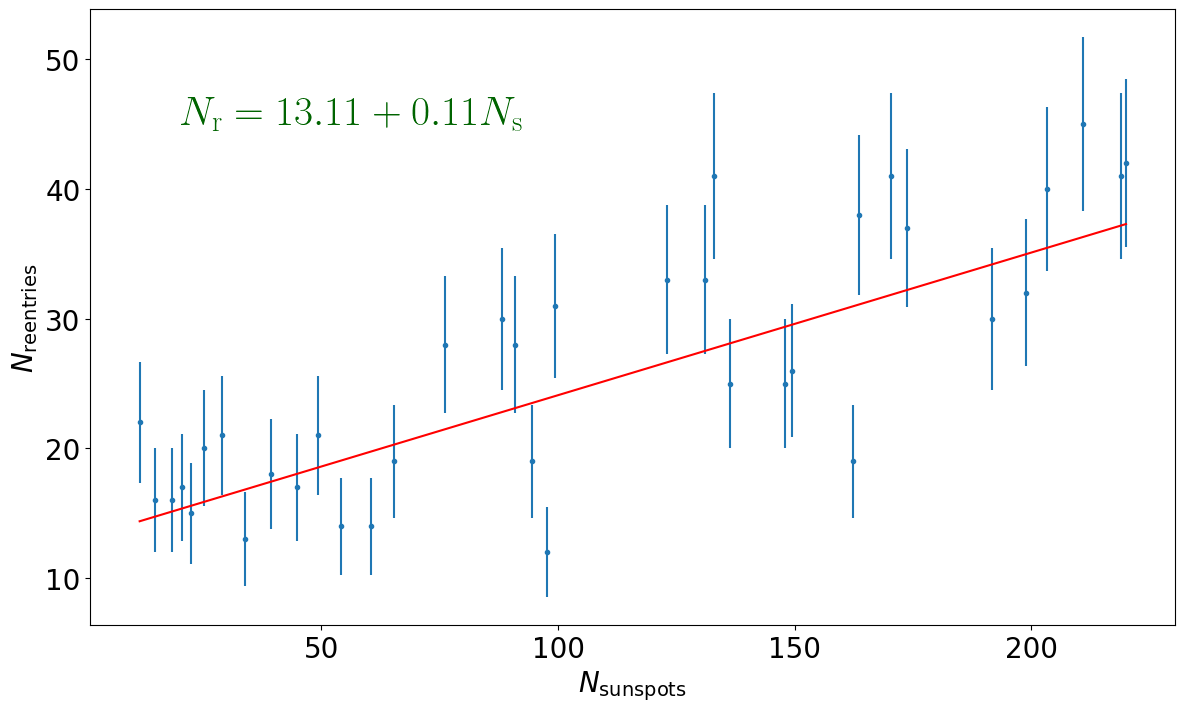

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Question 2c
def plot_linear_fit(ax, n_sunspots, n_reentries, a, b, cov):
    """Plot the linear fit n_reentries = a + b n_sunspots on the given matplotlib axis.
    """
    # Hints:
    # 1. Plot all the points (n_sunspots, n_reentries) with error bars for n_reentries
    #    based on sigma(N) = sqrt(N)
    # 2. Draw the best linear fit N = a + b T
    # 3. Write the best fit in text on the plot somewhere
    # 4. Don't forget to label your axes.
    
    ### BEGIN SOLUTION
    common_indx = n_sunspots.index.intersection(n_reentries.index)    
    
    matplotlib.rc('text', usetex=True)  # Not required, but makes the labels look nicer.
    x = n_sunspots[common_indx]
    y = n_reentries[common_indx]
    sigma = np.sqrt(y)
    
    ax.errorbar(x,y,sigma, fmt='o', ms=3)  # fmt='o' stops it from connecting the dots.
    xmin = np.min(x)
    xmax = np.max(x)
    ax.text(20,45,r'$N_{{\rm r}} = {:.2f} + {:.2f} N_{{\rm s}}$'.format(a,b),size=30, color='DarkGreen')
    ax.plot([xmin, xmax], [a+b*xmin, a+b*xmax], color='red')
    ax.set_xlabel(r'$N_{\rm sunspots}$', size=20)
    ax.set_ylabel(r'$N_{\rm reentries}$', size=20)
    ax.tick_params(labelsize=20)
    ### END SOLUTION

fig, ax = plt.subplots(1,1, figsize=(14,8))
plot_linear_fit(ax, n_sunspots, n_reentries, a, b, cov)
plt.show()

In [10]:
# Question 2d

# First a helper function to calculate the chisq value for any proposed values of a,b.
def calculate_chisq(n_sunspots, n_reentries, a, b):
    """Calculate chisq for a given proposed solution (a, b), assumuing var(N) = N.

    chisq = Sum_i (Nr_i - N_fit(Ns_i))^2 / var(Nr_i),
    where N_fit(Ns) = a + b Ns
    
    Returns chisq for the proposed values of a and b.
    """
    ### BEGIN SOLUTION
    x = n_sunspots
    y = n_reentries
    w = 1./y
    N_fit = a + b * x
    chisq = np.sum((y - N_fit)**2 * w)
    return chisq
    ### END SOLUTION

In [11]:
# Let's check this function at a few values:

# First, the value that we think is the minimum
a, b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)
bestfit_chisq = calculate_chisq(n_sunspots, n_reentries, a, b)
print('chisq at best fit solution = {:.3f}'.format(bestfit_chisq))

# Now a few values a bit shifted from what should be the minimum chisq
chisq1 = calculate_chisq(n_sunspots, n_reentries, a+2, b)
chisq2 = calculate_chisq(n_sunspots, n_reentries, a-2, b)
chisq3 = calculate_chisq(n_sunspots, n_reentries, a, b+0.05)
chisq4 = calculate_chisq(n_sunspots, n_reentries, a, b-0.05)
print('chisq at some nearby values = {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(chisq1,chisq2,chisq3,chisq4))

# These should all be larger than the best fit chisq
assert chisq1 > bestfit_chisq
assert chisq2 > bestfit_chisq
assert chisq3 > bestfit_chisq
assert chisq4 > bestfit_chisq

# Even a small shift from the best fit should give a slightly larger chisq
chisq5 = calculate_chisq(n_sunspots, n_reentries, a+0.05, b)
chisq6 = calculate_chisq(n_sunspots, n_reentries, a-0.05, b)
chisq7 = calculate_chisq(n_sunspots, n_reentries, a, b+0.001)
chisq8 = calculate_chisq(n_sunspots, n_reentries, a, b-0.001)
print('chisq at some very nearby values = {:.3f}, {:.3f}, {:.3f}, {:.3f}'.format(chisq5,chisq6,chisq7,chisq8))

# These should all still be slightly larger than the best fit chisq
assert chisq5 > bestfit_chisq
assert chisq6 > bestfit_chisq
assert chisq7 > bestfit_chisq
assert chisq8 > bestfit_chisq

### BEGIN HIDDEN TESTS
nfail=0

# Check the function for a few random a,b pairs:
for (a,b) in [ (true_a, true_b), (12, 0.1), (15, 0.14), (10.2, 0.21), (20, 0.55) ]:
    check_chisq = calculate_chisq(n_sunspots, n_reentries, a, b)
    true_chisq = np.sum((n_reentries - (a+b*n_sunspots))**2 * (1/n_reentries))
    #print(check_chisq, true_chisq)
    with log_assert():
        assert np.isclose(check_chisq, true_chisq, rtol=1.e-4), (check_chisq, true_chisq)

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

chisq at best fit solution = 52.528
chisq at some nearby values = 58.91, 58.91, 97.35, 97.35
chisq at some very nearby values = 52.532, 52.532, 52.546, 52.546

Total of 0 test failures


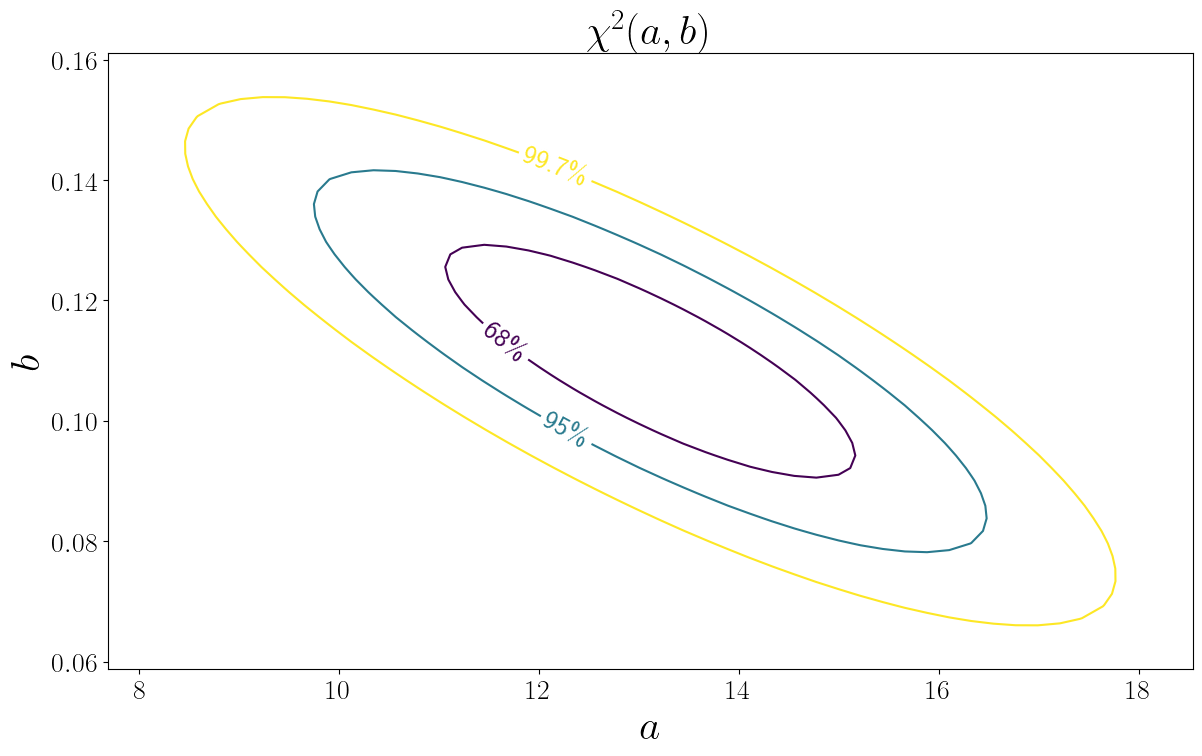

In [12]:
# Question 2d (continued)

# Now we can use the above function to plot chisq values for many a,b values as a contour plot.
def plot_chisq_ellipses(ax, n_sunspots, n_reentries):
    """Plot ellipses at the 1, 2, and 3-sigma contours of a,b
    """
    # Hints: 
    # 1. Use the ax.contour function.
    # 2. Use fit_reentries_vs_sunspots to determine where the center of the plot should be.
    # 3. Use calculate_cov to get an estimate of the two sigmas, so you can have
    #    the ranges of a,b go to about +- 4 sigma in each direction.
    # 4. If your contours look too chunky, try increasing the number of points.
    
    ### BEGIN SOLUTION    
    npoints = 50  # Higher numbers are slower but make for smoother contours.

    # Faster to clip to the common index first so it doesn't have to be redone each time.
    common_indx = n_sunspots.index.intersection(n_reentries.index)    
    n_sunspots = n_sunspots[common_indx]
    n_reentries = n_reentries[common_indx]
    
    # Get the covariance matrix, so we can go out 4 sigma in each direction.
    bestfit_a, bestfit_b = fit_reentries_vs_sunspots(n_sunspots, n_reentries)
    cov = calculate_cov(n_sunspots, n_reentries)
    sigma_a = np.sqrt(cov[0,0])
    sigma_b = np.sqrt(cov[1,1])
    
    a_values = np.linspace(bestfit_a - 4.*sigma_a, bestfit_a + 4.*sigma_a, npoints, endpoint=True)
    b_values = np.linspace(bestfit_b - 4.*sigma_b, bestfit_b + 4.*sigma_b, npoints, endpoint=True)
    
    chisq_min = calculate_chisq(n_sunspots, n_reentries, bestfit_a, bestfit_b)
    
    chisq = [[calculate_chisq(n_sunspots,n_reentries,a1,b1) for a1 in a_values] for b1 in b_values]
    levels = [chisq_min + 2.30, chisq_min + 6.17, chisq_min + 11.8]
    contour = ax.contour(a_values, b_values, chisq, levels=levels)
    
    fmt = {}
    strs = [r'68\%', r'95\%', r'99.7\%']
    for l, s in zip(contour.levels, strs):
        fmt[l] = s
    ax.clabel(contour, inline=1, fontsize=20, fmt=fmt)
    ax.set_xlabel(r'$a$', fontsize=30)
    ax.set_ylabel(r'$b$', fontsize=30)
    ax.set_title(r'$\chi^2(a,b)$', fontsize=30)
    ax.tick_params(labelsize=20)
    ### END SOLUTION

fig, ax = plt.subplots(1,1, figsize=(14,8))
plot_chisq_ellipses(ax, n_sunspots, n_reentries)
plt.show()

---

**Question 3**

It is common practice in data analysis to demonstrate that your estimator produces unbiased results - i.e., the true parameters values are *on average* recovered.  Do the following to show that your estimators for $a$ and $b$ above are unbiased:

(a) (3 pts) Write a function that draws $N$ points $\{x_i, y_i\}$ from the model,
$$
    y = a + b x
$$
where $x_i$ is drawn from a uniform distribution in the range $[x_{\mathrm{min}}, x_{\mathrm{max}}]$ and $y_i$ is drawn from a Gaussian distribution centered on $y = a + bx_i$ with fixed standard deviation $\sigma$.  Also, write a function that fits for $a, b$ given arrays $x, y$.
  
(b) (3 pts) Using $N=90$, $x_{\mathrm{min}}=18, x_{\mathrm{max}}=38, a=200, b=10$, and $\sigma=10$, generate 10000 realizations of the dataset, determine the inverse-variance-weighted mean values of $\langle a \rangle$ and $\langle b \rangle$, along with their uncertainties $\sigma_{\langle a \rangle}$, $\sigma_{\langle b \rangle}$.  Show that your estimators for $a$ and $b$ are unbiased - i.e, the true value falls within one or two standard deviations from the means of $a$ and $b$.

(c) (2 pts) Plot the histogram of $\chi^2$ values of the 10,000 realization from above, and overplot an appropriately scaled $p(\chi^2; \nu)$ distribution for $\nu=90-2=88$ degrees of freedom.

In [13]:
# Question 3a
def sim_linear(N, xmin, xmax, a, b, sigma):
    """Simulate an experiment with the true relation y = a + b x.
    
    N is the number of data points in the returned arrays.
    xmin, xmax give the range of x values.  The returned x values are uniformly sampled from [xmin, xmax]
    a, b are the true coefficients of the linear relation y = a + b x
    sigma is a constant Gaussian uncertainty of the y values relative to the truth values.

    Returns x, y, both N-element numpy arrays
    """
    # Hint: Use numpy.random.normal for the Gaussian distribution.
    
    ### BEGIN SOLUTION
    x = np.random.uniform(xmin, xmax, N)
    y = a + b*x
    y += np.random.normal(0, sigma, N)
    return x, y
    ### END SOLUTION

def fit_linear(x, y, sigma):
    """Perform a linear fit y = a + b x, given a constant uncertainty, sigma, of the y values.
    
    Returns a, b, sigma_a, sigma_b
    """
    # Note: Don't use a canned fitting function from scipy, scikit-learn, or other similar package.

    ### BEGIN SOLUTION
    w = 1./sigma**2
    S = len(x) * w  # Since sigma is constant, np.sum(w) doesn't work here.
    Sx = np.sum(w * x)
    Sy = np.sum(w * y)    
    Sxx = np.sum(w * x * x)
    Sxy = np.sum(w * x * y)
    Delta = Sxx * S - Sx**2
    a = (Sxx * Sy - Sx * Sxy) / Delta
    b = (Sxy * S - Sx * Sy) / Delta
    siga = np.sqrt(Sxx / Delta)
    sigb = np.sqrt(S / Delta)
    return a, b, siga, sigb
    ### END SOLUTION

In [14]:
N = 90
xmin = 18
xmax = 38
true_a = 200
true_b = 10
sigma = 10

# Before running a full simulation suite, it's a good idea to check the two ancillary functions
# to make sure they are working correctly.
# Make a single simulation and fit the parameters for it to make sure you get something reasonable.
x, y = sim_linear(N, xmin, xmax, true_a, true_b, sigma)
print('One simulation yielded arrays:')
print('x =',x)
print('y =',y)

assert len(x) == N
assert len(y) == N
assert np.all(x >= xmin)
assert np.all(x <= xmax)

# And check that your fitting function gets something close to the true values.
a, b, siga, sigb = fit_linear(x, y, sigma)
print('The linear fit for this simulation is:')
print('a = {:.3f} +- {:.3f}'.format(a, siga))
print('b = {:.3f} +- {:.3f}'.format(b, sigb))

# These aren't necessarily very close to the true values, but they should be
# vaguely similar.  (We'll check this more precisely in 3b)
assert np.isclose(a, true_a, rtol=0.1)
assert np.isclose(b, true_b, rtol=0.1)

# These aren't techinically *always* true, but the estimated values should almost always be within
# 5 sigma of the true answer.  Indeed >99% of the time, they should be within 3 sigma.
assert abs(a - true_a) < 5*siga
assert abs(b - true_b) < 5*sigb

### BEGIN HIDDEN TESTS
nfail = 0

yerr = y - true_a - true_b * x
with log_assert():
    assert np.isclose(yerr.var(), sigma**2, rtol=0.5), (yerr.var(), sigma**2)

# If sigma = 0, should be exact.
x1, y1 = sim_linear(N, xmin, xmax, true_a, true_b, 0.)
yerr1 = y1 - (true_a + true_b * x1)
with log_assert():
    assert np.allclose(y1, true_a + true_b * x1), np.max(yerr1)

# If N = 10^4, the variance should be much closer.
x2, y2 = sim_linear(10000, xmin, xmax, true_a, true_b, sigma)
yerr2 = y2 - true_a - true_b * x2
with log_assert():
    assert np.isclose(yerr2.var(), sigma**2, rtol=0.05), (yerr2.var(), sigma**2)

# Make sure other values are not hard-coded.
x3, y3 = sim_linear(50, -300, 0, 10, 5, 1.e-5)
with log_assert():
    assert len(x3) == 50, len(x3)
with log_assert():
    assert len(y3) == 50, len(y3)
with log_assert():
    assert np.all(x3 >= -300), np.min(x3)
with log_assert():
    assert np.all(x3 <= 0), np.max(x3)
yerr3 = y3 - (10 + 5*x3)
with log_assert():
    assert np.allclose(y3, 10 + 5*x3, atol=1.e-4), np.max(np.abs(yerr3))

# Check fitLinear for a different (more accurate) data set
a3, b3, siga3, sigb3 = fit_linear(x3, y3, 1.e-5)
with log_assert():
    assert np.isclose(a3, 10, rtol=1.e-4), a3
with log_assert():
    assert np.isclose(b3, 5, rtol=1.e-4), b3
with log_assert():
    assert np.isclose(siga3, 2.9e-6, rtol=0.3), siga3
with log_assert():
    assert np.isclose(sigb3, 1.6e-8, rtol=0.3), sigb3

# Check fitLinear against correct code
def correct_fit_linear(x, y, sigma):
    w = 1./sigma**2
    S = len(x) * w
    Sx = np.sum(w * x)
    Sy = np.sum(w * y)    
    Sxx = np.sum(w * x * x)
    Sxy = np.sum(w * x * y)
    Delta = Sxx * S - Sx**2
    a = (Sxx * Sy - Sx * Sxy) / Delta
    b = (Sxy * S - Sx * Sy) / Delta
    siga = np.sqrt(Sxx / Delta)
    sigb = np.sqrt(S / Delta)
    return a, b, siga, sigb
a4, b4, siga4, sigb4 = correct_fit_linear(x, y, sigma)
with log_assert():
    assert np.isclose(a, a4), (a, a4)
with log_assert():
    assert np.isclose(b, b4), (b, b4)
with log_assert():
    assert np.isclose(siga, siga4), (siga, siga4)
with log_assert():
    assert np.isclose(sigb, sigb4), (sigb, sigb4)

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

One simulation yielded arrays:
x = [30.59155782 20.83490611 21.69392679 29.54945499 24.83174629 34.76013916
 31.89448739 18.1355521  20.95331173 32.93051786 37.35315954 34.93056055
 18.79253767 35.26447006 22.31814227 23.28548296 34.66735548 25.47989784
 32.64567373 19.819099   30.26777381 19.28238398 18.92933326 30.8536282
 32.36631292 27.64751518 30.48392575 29.14648688 19.26401499 22.0066448
 28.09118753 30.63904555 28.35814187 22.76069785 35.67409323 25.72174323
 30.5612107  34.80060419 19.0400401  18.92749822 36.90497629 23.59081455
 18.55355171 27.25716112 18.02996306 37.91357421 22.16662886 35.72196095
 37.16116561 20.37326951 30.64805387 26.10185949 26.67526376 34.96759092
 35.24199365 31.16558485 28.0431087  26.93252908 23.19770803 36.93778102
 30.35845829 19.44738513 28.04503682 28.54011012 22.05360801 19.7453797
 33.21835271 24.12996531 27.24057722 33.49976507 26.23679722 22.54744948
 19.24155657 26.89872478 28.14386653 35.85089682 31.50361608 31.23147507
 18.3159889  24.932

In [15]:
# Question 3b
def run_simulation(N, xmin, xmax, true_a, true_b, sigma, Nsim):
    '''
    1. Generates Nsim realizations of the dataset.
    2. Determine the MLE of a, b, sigma_a, sigma_b for 
       each realization
    3. Find the chisq of each realization
    4. Calculate the inverse-variance-weighted mean of
       a and b and the corresponding uncertainties
       for each realiation.
    
    Returns: chisqs, mean_a, mean_b, sig_meana, sig_meanb
    '''
    ### BEGIN SOLUTION
    a = np.empty(Nsim)
    b = np.empty(Nsim)
    siga = np.empty(Nsim)
    sigb = np.empty(Nsim)
    chisqs = np.empty(Nsim)

    for isim in range(Nsim):
        x, y = sim_linear(N, xmin, xmax, true_a, true_b, sigma)
        a[isim], b[isim], siga[isim], sigb[isim] = fit_linear(x, y, sigma)
        chisqs[isim] = np.sum((y-(a[isim] + b[isim]*x))**2/sigma**2)

    Sa = np.sum(1./siga**2)
    Sb = np.sum(1./sigb**2)
    mean_a = np.sum(a/siga**2)/Sa
    mean_b = np.sum(b/sigb**2)/Sb
    sig_meana = 1./np.sqrt(Sa)
    sig_meanb = 1./np.sqrt(Sb)

    return chisqs, mean_a, mean_b, sig_meana, sig_meanb
    ### END SOLUTION

In [16]:
N = 90
xmin = 18
xmax = 38
true_a = 200
true_b = 10
sigma = 10
Nsim = 10000

chisqs, mean_a, mean_b, sig_meana, sig_meanb = run_simulation(N, xmin, xmax, true_a, true_b, sigma, Nsim)

print('True a, b = ', true_a, true_b)

print('Inverse-variance-weighted mean of sims:')
print('   a = {:.5f} +- {:.5f}'.format(mean_a, sig_meana))
print('   b = {:.5f} +- {:.5f}'.format(mean_b, sig_meanb))

assert len(chisqs) == Nsim

print('Mean chisq of simulations is {:.2f}'.format(np.mean(chisqs)))

# Now our estimates should be much more precise.
assert np.isclose(mean_a, true_a, rtol=1.e-3)
assert np.isclose(mean_b, true_b, rtol=1.e-3)

assert abs(mean_a - true_a) < 5*sig_meana
assert abs(mean_b - true_b) < 5*sig_meanb

### BEGIN HIDDEN TESTS
assert np.isclose(sig_meana, 0.0525, rtol=0.01)
assert np.isclose(sig_meanb, 0.00184, rtol=0.01)

print('mean,var of chisqs = ', np.mean(chisqs), np.var(chisqs))
print('should be close to ', N-2, 2*(N-2))
assert np.isclose(np.mean(chisqs), N-2, rtol=0.02)
assert np.isclose(np.var(chisqs), 2*(N-2), rtol=0.05)

print(f"\nTotal of {nfail} test failures")
assert nfail == 0
### END HIDDEN TESTS

True a, b =  200 10
Inverse-variance-weighted mean of sims:
   a = 200.02653 +- 0.05249
   b = 9.99926 +- 0.00184
Mean chisq of simulations is 87.87
mean,var of chisqs =  87.86687874759188 173.82481202962776
should be close to  88 176

Total of 0 test failures


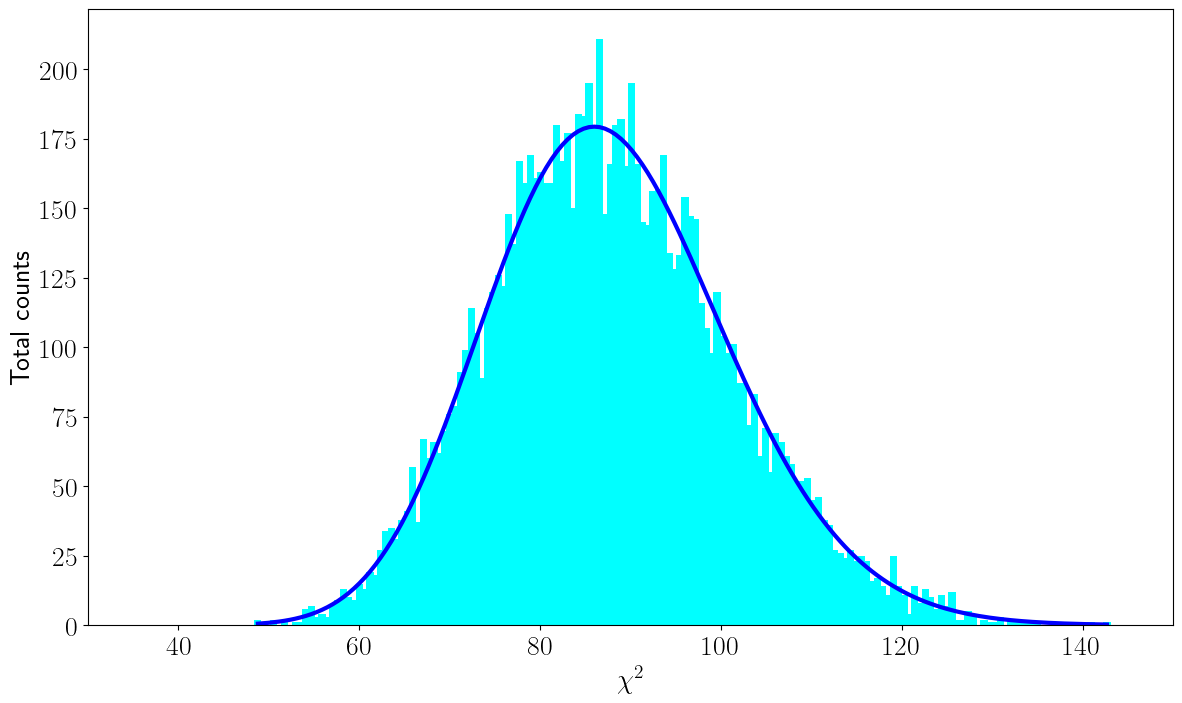

In [17]:
import scipy.stats

# Question 3c
def plot_chisq_hist(ax, chisq, nu):
    '''Plots a histogram of chisq values
    Also overplots a chisq distribution for nu degrees of freedom.
    '''
    # Hint: See the pdf method of scipy.stats.chi2.
    
    ### BEGIN SOLUTION
    hist, bins = np.histogram(chisq, bins=160)
    center = (bins[:-1] + bins[1:]) / 2
    ax.bar(center, hist, align='center', color='cyan')
    chi2_dist = scipy.stats.chi2(nu)
    scale = len(chisqs) * (bins[1]-bins[0])
    ax.plot(center, chi2_dist.pdf(center) * scale, color='blue', lw=3)
    ax.set_xlabel(r'$\chi^2$', fontsize=20)
    ax.set_ylabel('Total counts', fontsize=20)
    ax.set_xlim(30,150)
    ax.tick_params(labelsize=20)
    ### END SOLUTION

fig, ax = plt.subplots(1, 1, figsize=(14,8))
plot_chisq_hist(ax, chisqs, N-2)
plt.show()